In [1]:
import numpy as np
import matplotlib.pyplot as plt

/mnt/home/freem386/anaconda3/envs/research/lib/python3.9/site-packages/numpy/ma/core.py:6852: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


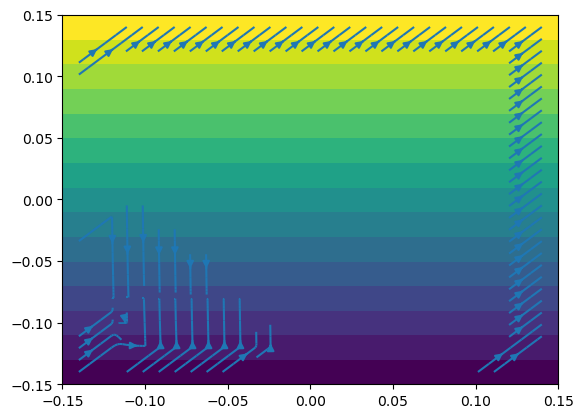

In [14]:
i = 1
u = np.genfromtxt('output/u'+str(i)+'.csv', delimiter=',')
v = np.genfromtxt('output/v'+str(i)+'.csv', delimiter=',')
x = np.genfromtxt('laminar/x.csv', delimiter=',')
y = np.genfromtxt('laminar/y.csv', delimiter=',')
p = np.genfromtxt('laminar/p.csv', delimiter=',')

X, Y = np.meshgrid(x, y)
plt.pcolor(x, y, p.T, shading='auto')
plt.streamplot(X, Y, u, v)
plt.show()